# Univariate Data

## Categorical Data

Are variables whose responses are either categories or groups

<b>Summarise</b>

Using frequency Tables to look at the counts, percentages, sums, etc.

For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.

`x.count / x.sum()`

<b> Visualise </b>

- Bar charts:

        x-axis = categorical data
        y-axis = frequency table values

- Pie charts:

categorical variable as a function of a frequency value

<i> Disadvantages: </i>

can have overlaps with small fractions, hard to understand without numerical data

## Applications in Python

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

sns.set()

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Using GCA:**

we can get the current axis and specifying methods on it:

``` python 
ax = plt.gca()
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("")
```

**Using inline magic:**

`%matplotlib notebook` makes plots interactive

if plot is too big, adjust the subplot so the text doesn't run off the image

`plt.subplots_adjust(bottom=0.25)`

### Creating a Bar Chart

we can use the matplotlib object `bar()` to construct a bar chart

In [ ]:
# plot bar chart

plt.figure()
plt.bar(diamonds["cut"], diamonds["color"])

## Quantitative Variables

variabels that have a numerical value that we can perform mathematical operations on (discrete and continuous random variables), like height, etc.

### Histograms

x-axis = random variable
y-axis = frequency etc

bins = how many are within the range

- shape (skeweness/kurtosis)

- center (mean is sensitive to extreme observations or median {splits the area of the curve in half})

- spread (range [max-min], variance, sd, interquartile range)

- outliers (if skewed are on the high end of the skew)

unimodal means just one peak
multi(bi)modal means more peaks

if distribution is:

a. Right Skewed: mean > median 

b. Left Skewed: mean < median

c. Symmetric: mean = median

SD

on average the data is SD value from the mean

### Numerical Summaries

Min (0%)
1st quartile (25% of the data lies below this value)
median (50% of the data falls below this value)
3rd quartile (75%)
max (100%)

Interquartile range (IQR) is a measure of spread: 
Q3 - Q1
tells us where most of the data falls in

Range = max - min

(describe in python)

### Empirical rule

Bell Curve and Normal Distribution

68% of the data lies within 1$\sigma$ 

95% of the data lies within 2$\sigma$

99.7% of the data lies within 3$\sigma$

### Standard Score (z-score)

Distance from mean divided by sd

$\frac{X_i - \bar{X}}{\sigma}$

where $X_i$ is the observation

IS a way to standardise and compare across observations

0 is the mean:
positive sign -> above mean
negative sign -> below mean
abs(z score) -> by how much

### Box Plots

Gives a visual representation of the five number summary

whiskers = max, min

Celiing of box Q3

Line = Median

Floor of box = Q1

Length of box = IQR

Advantage:
can help identify outliers and are drawn separately
Usefiul for comparing sets of observations

Disadvantage:
But can hide gaps and clusters

## Application in Python

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set()

tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<b> Describing Data </b>
    
Summary statistics

In [18]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<b> Creating a Histogram </b>

Single Plot

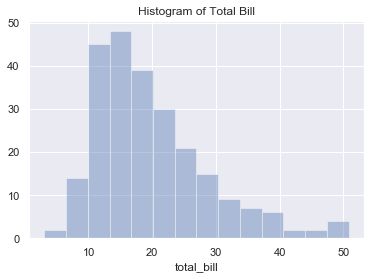

In [283]:
sns.distplot(tips_data["total_bill"], kde = False).set_title("Histogram of Total Bill")
plt.show()

Multiplot

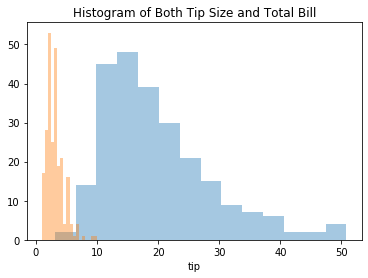

In [31]:
sns.distplot(tips_data["total_bill"], kde = False)
sns.distplot(tips_data["tip"], kde = False).set_title("Histogram of Both Tip Size and Total Bill")
plt.show()

<b> Creating a Box Plot </b>

Single Plot

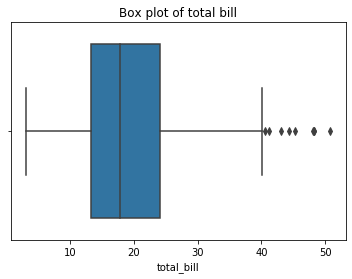

In [32]:
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of total bill")
plt.show()

Multiplot

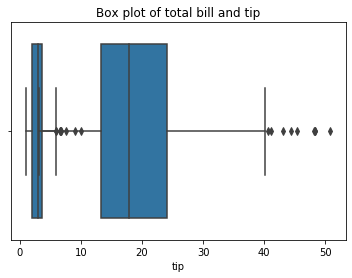

In [33]:
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of total bill and tip")
plt.show()

<b> Create Histograms and Boxplots Plotted by Groups </b>

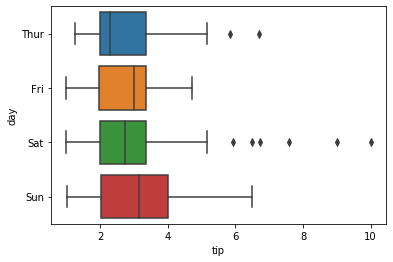

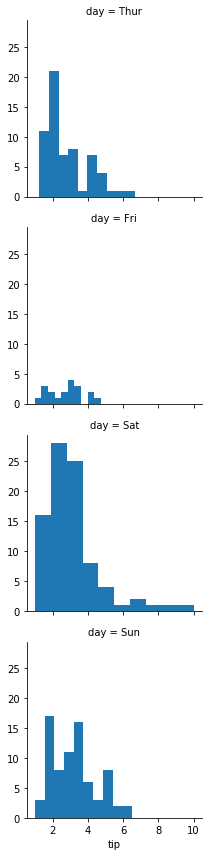

In [35]:
# Boxplot
## x is the data, y is the grouping 
sns.boxplot(x = tips_data["tip"], y = tips_data["day"])

# Distributions
## Create a facet gri
dist = sns.FacetGrid(tips_data, row="day")
## plot the facet grid by hist using tip data
dist = dist.map(plt.hist, "tip")

plt.show()

<b> Handling Missing Data in Summaries </b>

In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.

`df["new column"] = df["column"].fillna("label you want to give it")`

<b> Marginal BoxPlot Distributions </b>

To compare several distributions, we can use side-by-side boxplot s

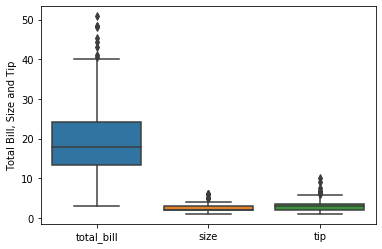

In [48]:
bp = sns.boxplot(data = tips_data.loc[:, ["total_bill", "size", "tip"]])
bp.set_ylabel("Total Bill, Size and Tip")
plt.show()

### Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own.  We can then formally or informally compare the findings in the different strata.  When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.

In this case we can cut the tips data in groups made of tuples (1,2) ... (5,6) so that we can observe how much do people in a tip group usually pay per meal.

<b> How to plot: </b>

1. Categorical Range variables

2. Quantitative Variables

3. Coloring hue: another Categorical Variable

<b> Example 1: </b>

Separating by categorical range variable with second categorical variable in hue

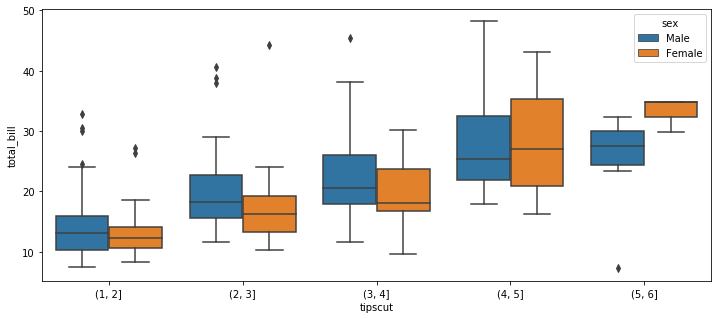

In [72]:
# cut the data
tips_data["tipscut"] = pd.cut(tips_data.tip, [1, 2, 3, 4, 5, 6])
plt.figure(figsize=(12,5))
# plot the categorical tuples on x-axis, quantitative data on y-axis
sns.boxplot(x= "tipscut",  y = "total_bill", hue="sex",data=tips_data)
plt.show()

<b> Example 2: </b>

Separating by the second categorical variable with the categorical range variable in hue

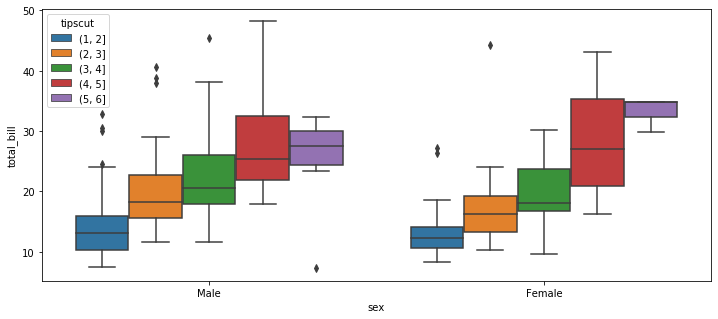

In [73]:
# cut the data
tips_data["tipscut"] = pd.cut(tips_data.tip, [1, 2, 3, 4, 5, 6])
plt.figure(figsize=(12,5))
# plot the categorical tuples on x-axis, quantitative data on y-axis
sns.boxplot(x= "sex",  y = "total_bill", hue="tipscut",data=tips_data)
plt.show()

<b> Stratification using pivot tables: </b>

example goal: look at the compare proportions of female tip groups across days

In [96]:
# ~ gets the inverse of
## locate the row that is in "Male" and remove it
df = tips_data.loc[~tips_data.sex.isin(["Male"]), :]

# Groupyby
df = df.groupby(["tipscut"])["day"]
df = df.value_counts()

# restructure the results from long to wide
df = df.unstack()

# normalise within each stratum to get proportions
df = df.apply(lambda x: x/x.sum(), axis = 1)

# limit decimal place
df = df.apply(lambda x: round(x,2))

df


day,Fri,Sat,Sun,Thur
tipscut,,,,
"(1, 2]",0.04,0.20,0.12,0.64
"(2, 3]",0.15,0.44,0.11,0.30
"(3, 4]",0.11,0.26,0.47,0.16
"(4, 5]",0.11,0.33,0.11,0.44
"(5, 6]",NaN,NaN,0.67,0.33


# Multivariate Data

## Multivariate Categorical Data

Can be displayed using two-way tables or different types

Univariate displays the total
Multivariate displays the segementation of the total

## Multivariate Quantitative Data

More than one trait recorded per unit, takes on a measured numeric value

### Scatter Plot 

Displays 2 quantitative variables together

It gives you the joint distribution from the two marginal distributions

<b> Useful for understanding Associations </b>

- Type (linear, quadratic, no pattern)

- Direction (positive, negative slope)

- Strength (degree of variance):
    - Weak Linear Association (points are largely scattered along a line)
    - Moderare Linear Association (points are partially scattered along a line)
    - Strong Linear Association (points are minimally scattered along a line)
    
<b> Correlations </b>

Allow to quantify both the direction and sign of an association using Pearson correlation $\rho$

Scatter plots allow to identify outliers

### Displaying both Multivariate Categorical and Quantitative Data

Scatterplots with:

- Value = Quantitative Data

- Colour = Categorical Data

## Simpson's Paradox

A confounding variable is an outside influence that changes the relationship between the independent and the dependent variable. It oftentimes works by affecting the causal relationship between the primary independent variable and the dependent variable. This confounding variable confuses the relationship between two other variables; it may act by hiding, obscuring, or enhancing the existing relationship.

For example, suppose that you are interested in examining how activity level affects weight change. Other factors, like diet, age, and gender may also affect weight change and come into play when looking at the relationship between activity level and weight change. If one doesn’t control for these factors, the relationship between activity level and weight change can be distorted.

## Applications in Python

### Multivariate Data Selection

In [98]:
tips_data.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tipscut'], dtype='object')

<b>Column Selection</b>

In [105]:
names = ['total_bill', 'tip', 'sex']
tips_data[names].head()

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


<b>Row and Column Selection with loc</b>

In [106]:
names = ['total_bill', 'tip', 'sex']
tips_data.loc[:, names].head()

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female


<b>Row and Column Selection with iloc</b>

In [108]:
names = ['total_bill', 'tip', 'sex']
tips_data.iloc[:, 2:5].head()

,sex,smoker,day
0,Female,No,Sun
1,Male,No,Sun
2,Male,No,Sun
3,Male,No,Sun
4,Female,No,Sun


<b>Calculating the mean on Conditional Selection and Slicing</b>

To retrieve column index:

`df.columns.get_loc("column name")`

N.B. Beware of indeces not starting at 0

Use iloc to get the rows from 0
if using loc it will get the labels of the rows and row 0 might be NaN

In [140]:
pd.Series.mean(tips_data[tips_data.tip > 3].iloc[range(0,10),
                                                 tips_data.columns.get_loc("total_bill")])

22.418999999999997

### Scatterplots

**Labelling:**

Labelling a scatter plot is useful to create a legend, can also distinguish different scatter plots by colour

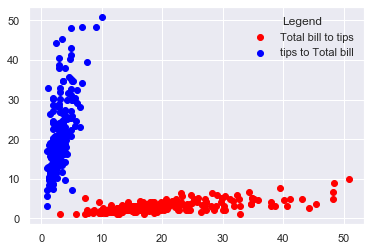

In [243]:
# first scatter
plt.scatter(tips_data["total_bill"], tips_data["tip"], 
            label = "Total bill to tips", 
            c = "red")

# second scatter
plt.scatter(tips_data["tip"], tips_data["total_bill"], 
            label = "tips to Total bill", 
            c = "blue")

# legend
plt.legend(loc=1, title="Legend", frameon = False)

### Plot Lines

Useful for time series data

**Smart indexing:**

do not necessarily need to specify the x-axis as it can use the index of a Series as the x value

Identifies as two series and automatically uses different colours

**Legend:**

need to create legend entries as labelling like scatter do not exist

**Shape of line:**

can specify different shapes on the series

`"-o"` is connected lines
`"--r"` is dashed lines

in this case we can see that the higher the total bill (above graphe) the higher the tip (below graph)

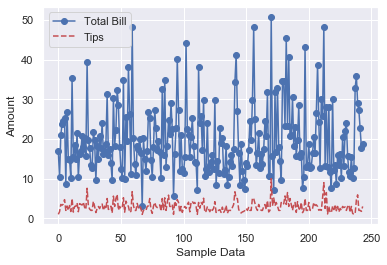

In [247]:
# plot both 
plt.plot(tips_data["total_bill"], "-o", tips_data["tip"], "--r")

# label
plt.xlabel("Sample Data")
plt.ylabel("Amount")

# legend
plt.legend(["Total Bill", "Tips"])

## Multivariate Distributions

<b> Plotting Marginal and Joint Distributions </b>

In [124]:
# specify the moments of the distribution for x and y

r = 1
mean = [15, 5]
cov = [[1, r],[r,1]]
x, y = np.random.multivariate_normal(mean, cov, 400).T

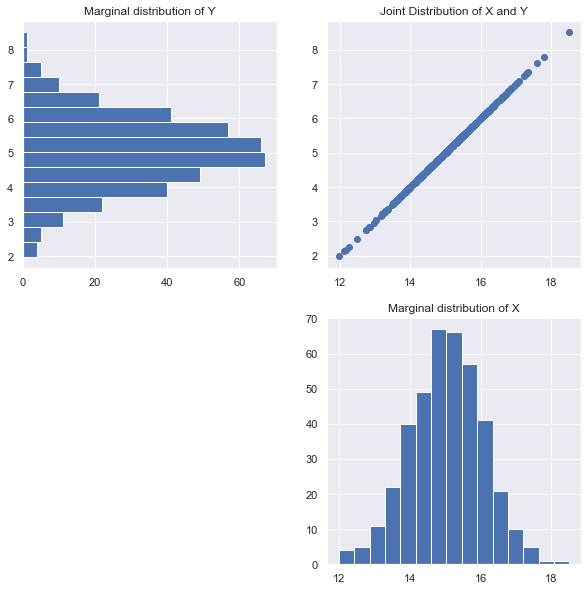

In [128]:
# specify figure size 
plt.figure(figsize=(10,10))

# joint distribution
plt.subplot(2,2,2)
plt.scatter(x = x, y = y)
plt.title("Joint Distribution of X and Y")

# Marginal distribution of X
plt.subplot(2,2,4)
plt.hist(x = x, bins = 15)
plt.title("Marginal distribution of X")

# Marginal distribution of Y
plt.subplot(2,2,1)
plt.hist(x = y, bins = 15, orientation="horizontal")
plt.title("Marginal distribution of Y")

plt.show()

## Quantitative Bivariate Data

Bivariate data arises when every "unit of analysis" (person, etc.) is assessed with respect to two traits.

<b>The Issue of Overplotting:</b>

A scatterplot is a common visualization in this case. However, in a scatterplot with more than 100 points, "overplotting" is an issue. This means that many points fall on top of each other in the plot, which obscures relationships in the middle of the distributions and overemphasises extremes.

How to mitigate: 

**a. use an "alpha" channel to make points semi-transparent.**

- Joint

regplot generates a scatter plot on which to apply linear regression on

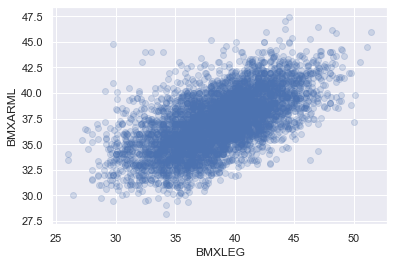

In [153]:
data = pd.read_csv("nhanes_2015_2016.csv")

sns.regplot(x = "BMXLEG", y = "BMXARML", data = data, fit_reg=False,
            scatter_kws={"alpha":0.2})
plt.show()

- Joint with Marginal

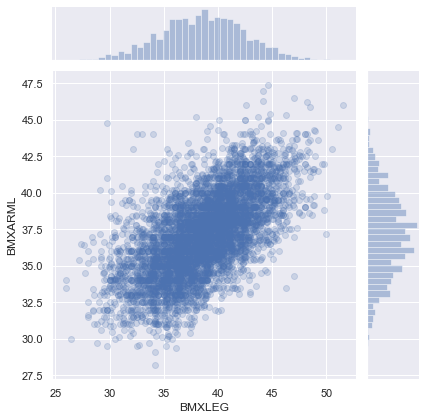

In [161]:
sns.jointplot(x = "BMXLEG", y = "BMXARML", data = data,
              joint_kws={"alpha":0.2})
plt.show()

<b>b. Plot a "density" of points:</b>

darker colors indicate where a greater number of points fall. The two plot margins show the densities for the x and y values separately, while the center plot shows their density jointly.

Plot by using kernel densities

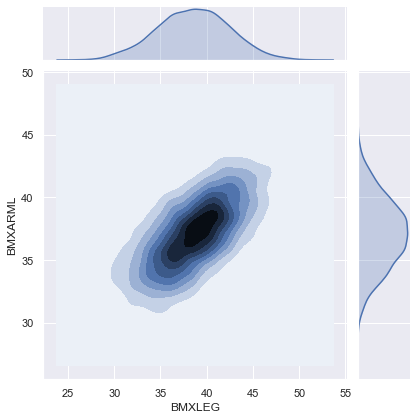

In [164]:
sns.jointplot(x = "BMXLEG", y = "BMXARML", kind = "kde", data = data)
plt.show()

## Heterogeneity and Stratification

**Heterogeneity** refers to the fact that most human characteristics for example are complex (vary by age, sex, gender etc.)

**Stratification** is useful when heterogeneity is present such that we can explore the data more deeply stratifying on relevant factors.

FacetGrid creates n grids with n being the number of categories in that column

- Stratifying by 1 categorical variable

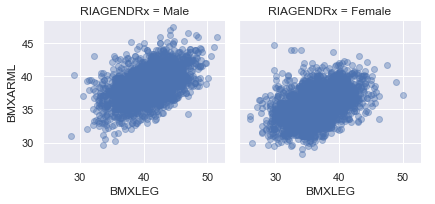

In [178]:
# change label names in the gender column to male and female

data["RIAGENDRx"] = data["RIAGENDR"].replace({1:"Male", 2:"Female"})

# plot

sns.FacetGrid(data, col="RIAGENDRx").map(plt.scatter, "BMXLEG", "BMXARML",
                                        alpha = 0.4).add_legend()

plt.show()

**Correlation** 

get correlation of:

row: first, second category in the column

column: the two quantitative variables

In [192]:
# for females

print("Females")
print(data.loc[data["RIAGENDRx"] == "Female",
               ["BMXLEG",  "BMXARML"]].dropna().corr())

# for males
print("\nMales")
print(data.loc[data["RIAGENDRx"] == "Male", 
          ["BMXLEG", "BMXARML"]].dropna().corr())

Females
           BMXLEG   BMXARML
BMXLEG   1.000000  0.434703
BMXARML  0.434703  1.000000

Males
           BMXLEG   BMXARML
BMXLEG   1.000000  0.505426
BMXARML  0.505426  1.000000


- Stratifying by 2 categorical variables

using both row and columns to fit the different categories

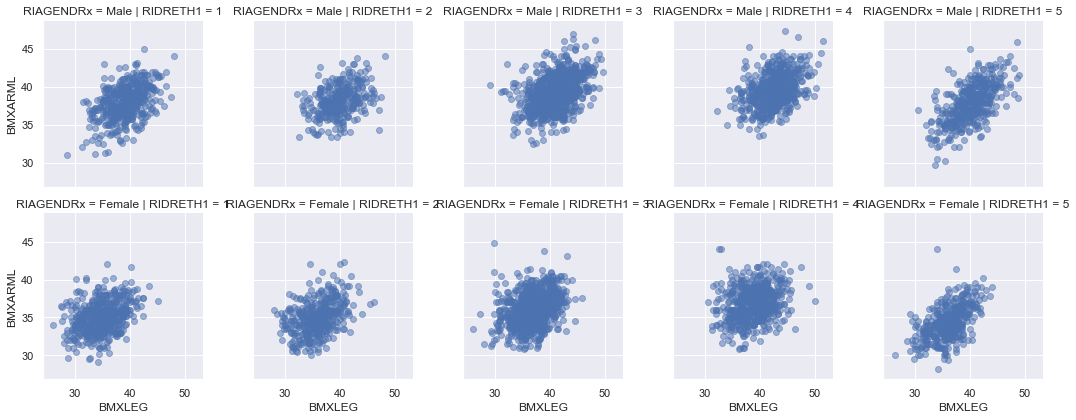

In [196]:
sns.FacetGrid(data, col = "RIDRETH1", row = "RIAGENDRx").map(plt.scatter,
                          "BMXLEG", "BMXARML", alpha = 0.5)

plt.show()

## Categorical Bivariate Data

**Contingency Tables:** counts the number of people having each combination of two factors

it essentially is a count of quantitative variables applied to two categorical variables

In [198]:
# improving the labelling on our dataset

data["DMDEDUC2x"] = data.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
data["DMDMARTLx"] = data.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
db = data.loc[(data.DMDEDUC2x != "Don't know") & (data.DMDMARTLx != "Refused"), :]

In [203]:
# create contingency table
## counting the number of people in each cell defined by
## a combination of education and marital status

cross_tab = pd.crosstab(db["DMDEDUC2x"], data["DMDMARTLx"])
cross_tab

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


**Normalisation of Data:**

- a. $\Sigma$ rows$=1$

- b. $\Sigma$ columns$=1$

- c. $\Sigma$ entire table$=1$

a. summarising by rows giving the proportion of people in each first (row) categorical variable who fall in each group of the second (column) categorical variable

where `axis = 1` is the row

In [204]:
cross_tab.apply(lambda x: x/x.sum(), axis = 1)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


b. summarising by columns to get the proportion of people within the column categorical variable who have each row categorical variable.

where `axis = 0` is the column

In [205]:
cross_tab.apply(lambda x:x/x.sum(), axis = 0)

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107266,0.151803,0.109712,0.116534,0.209677,0.101523
<9,0.089965,0.125237,0.122662,0.064741,0.231183,0.223350
College,0.207612,0.161290,0.297482,0.251992,0.118280,0.149746
HS/GED,0.219723,0.252372,0.197842,0.236056,0.215054,0.251269
Some college/AA,0.375433,0.309298,0.272302,0.330677,0.225806,0.274112


**Accounting for a third categorical variable:** there may be differences in the relationship between a row and column categorical variable that are explained by an $n^{th}$ categorical variable, therefore we apply a pivot table to investigate the relationship.

Therfore, we can look at the proportion of people in each **column** categorical variable, for each combination of **row** categorical variables **level 1** and **level 2**.

`unstack()` creates a piot table with the last column stated being the columns, or the last row categorical variable

In [214]:
# 1. group the data by every combination of the 3 categorical variables
# 2. count the number of people in every cell using the size method
# 3. pivot the column categorical variable into columns using unstack
# 4. Fill any empty cells with 0
# 5. Normalise the data by row

db.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size().unstack()\
            .fillna("-").apply(lambda x:x/x.sum(), axis = 1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

**Conditioning on a fourth categorical variable:** one factor that could explain the possible discrepancies arising from the results ofa multihierarchical table like this could be a **fourth** categorical variable.

Instead of repivotting with the entire table to account for this fourth categorical variable, we could simply condition the existing dataframe for specific parameters for this fourth categorical variable and then repivot

In [220]:
# condition on two conditions
 
## condition a
dx = db.loc[(db["RIDAGEYR"] >= 40) & (db["RIDAGEYR"] < 50)]
a = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size()\
                .unstack().fillna(0).apply(lambda x:x/x.sum(), axis = 1)

## condition b
dx = db.loc[(db["RIDAGEYR"] >= 50) & (db["RIDAGEYR"] < 60)]
b = dx.groupby(["RIAGENDRx", "DMDEDUC2x", "DMDMARTLx"]).size()\
                .unstack().fillna(0).apply(lambda x:x/x.sum(), axis = 1)

# get a specific column categorical variable sub category
# unstack it in the last level of row categorical variables

print("Ages 40 - 49\n")
print(a.loc[:, ["Married"]].unstack())
print(" ")
print("Ages 50 - 59\n")
print(b.loc[:, ["Married"]].unstack())

Ages 40 - 49

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000
 
Ages 50 - 59

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.490566  0.511111  0.648649  0.563107        0.496403
Male       0.666667  0.622642  0.737374  0.637255        0.555556


# Mixed Categorical and Quantitative Data

Analysing bivariate data consisting of one quantitative and one categorical variable.

Use for **distribution of row categorical variables** for each **column categorical variable**

- **Side-by-Side Box Plots:** 

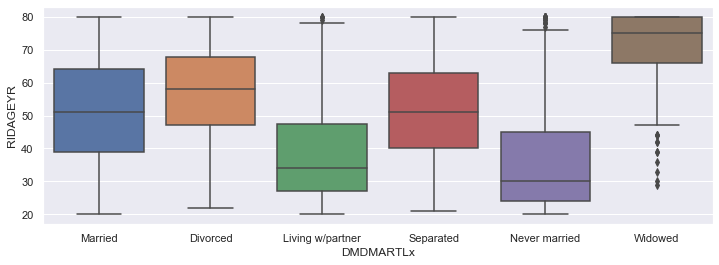

In [222]:
plt.figure(figsize=(12,4))
sns.boxplot(db["DMDMARTLx"], db.RIDAGEYR)
plt.show()

**Violin Plots:** gives insights on the shape on the distributions compared to a traditional boxplot

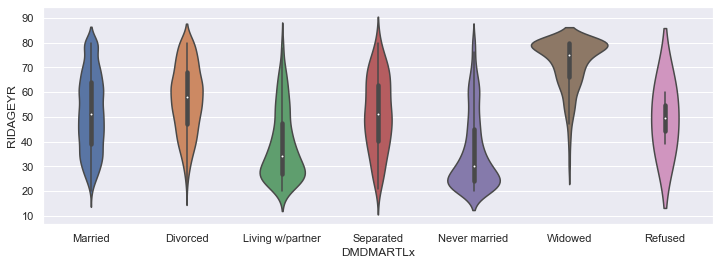

In [224]:
plt.figure(figsize=(12,4))
sns.violinplot(data["DMDMARTLx"], data["RIDAGEYR"])
plt.show()

# Time Series

**Generating a Datetime Range:**

the conversion has to be first registered

- **1. Generate a datetime using numpy** `arange()` by speciying the `dtype = "datetime64[D]"`

- **2. Convert numpy date object to Pandas DateTime** by applying to `pd.to_datetime(dates)` but by mapping the function instead: `list(map(pd.to_datetime, dates))`

In [302]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# numpy date range
dates = np.arange("2017-01-01", "2017-01-09", dtype = "datetime64[D]")

# map to_datetime on the numpy date range
dates = list(map(pd.to_datetime, dates))

dates

[Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-02 00:00:00'),
 Timestamp('2017-01-03 00:00:00'),
 Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-07 00:00:00'),
 Timestamp('2017-01-08 00:00:00')]

**plotting a simple datetime data:**

**Rotating Time Indices:**

use `.gca().xaxis` to get the current axis and loop on the tick labels to rotate each one by 45 degrees

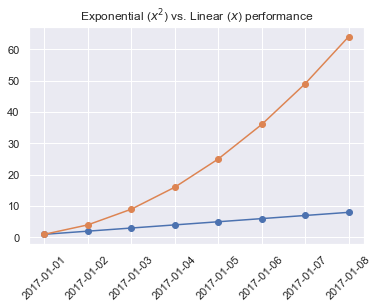

In [308]:
# get two lists of data

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# plot the line plot
plt.plot(dates, linear_data, "-o", dates, exponential_data, "-o")

# set title

plt.title("Exponential ($x^2$) vs. Linear ($x$) performance")

# rotate the tick labels to make it more readable

x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)